In [282]:
import pandas as pd


a_nas_pdf = pd.read_csv('../data/a_nas_pdf.csv', dtype=str)
a_nas = pd.read_csv('../data/a_nas.csv', dtype=str)

s_nas_pdf = pd.read_csv('../data/s_nas_pdf.csv', dtype=str)
s_nas = pd.read_csv('../data/s_nas.csv', dtype=str)

s_na = pd.read_csv('../data/s_na.csv', dtype=str)

logs = [a_nas_pdf, a_nas, s_nas_pdf,  s_nas, s_na]


In [283]:
# Drop YML User Actions
YML = ['1', '2', '3', '4', '6', '13', '14', '25']

def drop_yml_users(df):
    df = df[~df['User_ID'].isin(YML)]
    df.reset_index(drop=True, inplace=True)
    return df

# Process Date
def date_processing(df):
    df.Dated = pd.to_datetime(df.Dated)
    df.reset_index(drop=True, inplace=True)

    df['Date'] = df.Dated.dt.date
    df['Year'] = df.Dated.dt.year
    df['Month'] = df.Dated.dt.month
    df['Day'] = df.Dated.dt.day
    df['Week'] = df.Dated.dt.isocalendar().week
    df['WeekDay'] = df.Dated.dt.weekday

    return df

def drop_actions_without_reportID(df):
    df = df[df['NASReport_ID'] != '0']
    return df


In [284]:
s_nas = drop_yml_users(s_nas)
s_nas = date_processing(s_nas)
s_nas = drop_actions_without_reportID(s_nas)
s_nas.head()

# TODO: Join hotelID

# TODO: Actions where NASReport_ID = 0, investigate later, report?


# Distinct Action Types
# Only 'Viewed' / 'Sent'
s_nas.Action.str.split(n = 1, expand=True)[0].unique()

s_nas['SimpleAction'] = s_nas.Action.str.split(n = 1, expand=True)[0]



/home/ben/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/tmp/ipykernel_86653/4224403825.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df.Dated.dt.date
/tmp/ipykernel_86653/4224403825.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [288]:
# Actions per ReportID
# There are an average of 12 actions for each report
s_nas.groupby('NASReport_ID').size().mean()


# Users per ReportID
# On average, 3 different people will view report
s_nas.groupby('NASReport_ID')['User_ID'].nunique().mean()



# Life of ReportID
report_lifetime = s_nas.groupby('NASReport_ID')['Dated'].max() - s_nas.groupby('NASReport_ID')['Dated'].min()
# Drill down to time between actions


3.017699115044248

In [303]:
# Number of Actions
N_unique = s_nas.nunique().reset_index(name='UniqueValues')


# GroupBy ReportID, UserID, Date
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

actions_by_report = s_nas.groupby('NASReport_ID')
actions_by_date = s_nas.groupby('Date')
actions_by_user = s_nas.groupby('User_ID')

N_unique


,index,UniqueValues
0,S_NAS_ID,4084
1,User_ID,14
2,IP_Address,9
3,Action,24
4,Dated,3179
5,Browser_Used,2
6,NASReport_ID,339
7,Date,168
8,Year,2
9,Month,6


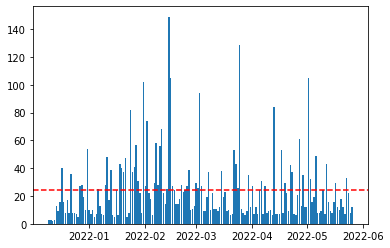

,Date,ActionCount
0,2021-12-10,3
1,2021-12-11,3
2,2021-12-12,2
3,2021-12-13,3
4,2021-12-14,13
...,...,...
163,2022-05-22,7
164,2022-05-23,33
165,2022-05-24,22
166,2022-05-25,8


In [320]:
# Analysis by Date

by_date = actions_by_date.size().reset_index(name='ActionCount')

mean_actions_per_day = by_date['ActionCount'].mean()

x, y = by_date['Date'], by_date['ActionCount']


plt.close("all")
plt.figure()

plt.bar(x, y)
plt.axhline(y=mean_actions_per_day, color='red', linestyle='--')



In [315]:
import matplotlib.pyplot as plt
plt.close("all")
plt.figure()
x = actions_by_report.NASReport_ID
y = actions_by_report.ActionCount

plt.bar(x, y)
plt.line(y = mean_actions_per_day)






AttributeError: 'DataFrameGroupBy' object has no attribute 'ActionCount'

<Figure size 432x288 with 0 Axes>

In [301]:
# Sent is the dominant action, although there are many views as well
s_nas.groupby('SimpleAction').size() 

# Now analyze who sends to who
s_nas.groupby(['SimpleAction', 'User_ID']).reset_index()




AttributeError: 'DataFrameGroupBy' object has no attribute 'reset_index'

In [36]:
# Accor Users Send Report to YML Users 
yml_notifications = s_nas[s_nas['Action'].str.contains('ymlgroup.com.au.')]
reports_notified = yml_notifications['NASReport_ID'].nunique()
yml_notifications




(6850, 7)

In [37]:
naslogs.shape


(1000, 9)